# Вопрос 2.1.

### Облако слов

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pymorphy2

In [4]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [5]:
from wordcloud import WordCloud

In [6]:
import nltk as nltk

In [7]:
from nltk.tokenize import word_tokenize 

In [8]:
from nltk.corpus import stopwords

In [9]:
stop_words = stopwords.words('russian')

In [10]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [11]:
text21 = ' '.join(df['2.1.'])
text21

'Да, конечно, локализация обязательна для российского рынка. Многие креативы мы получаем глобального характера от штаб-квартиры, но в любом случае мы адаптируем и сам текст локализуем, и также делаем свои местные глобальные креативы. Например, для встраиваемой техники мы делали отдельную фотосессию, для категории пылесосов было видео под запуск нового продукта. В любом случае местные креативы имеют место быть и даже в обязательном порядке, я бы сказала.  Нет, все, конечно, зависит от конкретной компании или коммуникационного блока. Всегда все адаптируется с точки зрения русского языка, с точки зрения наличия на нашем рынке продукта. Например, если продукт на нашем рынке представлен и продается, то мы можем взять глобальную коммуникацию и адаптировать ее, просто переведя на русский язык. Бывают случаи, когда мы получаем из штаб-квартиры какой-то креативный материал или какую-то коммуникационную стратегию, в которой задействованы продукты, которые не продаются на нашем рынке, Мы такой кр

In [12]:
text21 = word_tokenize(text21)
text21

['Да',
 ',',
 'конечно',
 ',',
 'локализация',
 'обязательна',
 'для',
 'российского',
 'рынка',
 '.',
 'Многие',
 'креативы',
 'мы',
 'получаем',
 'глобального',
 'характера',
 'от',
 'штаб-квартиры',
 ',',
 'но',
 'в',
 'любом',
 'случае',
 'мы',
 'адаптируем',
 'и',
 'сам',
 'текст',
 'локализуем',
 ',',
 'и',
 'также',
 'делаем',
 'свои',
 'местные',
 'глобальные',
 'креативы',
 '.',
 'Например',
 ',',
 'для',
 'встраиваемой',
 'техники',
 'мы',
 'делали',
 'отдельную',
 'фотосессию',
 ',',
 'для',
 'категории',
 'пылесосов',
 'было',
 'видео',
 'под',
 'запуск',
 'нового',
 'продукта',
 '.',
 'В',
 'любом',
 'случае',
 'местные',
 'креативы',
 'имеют',
 'место',
 'быть',
 'и',
 'даже',
 'в',
 'обязательном',
 'порядке',
 ',',
 'я',
 'бы',
 'сказала',
 '.',
 'Нет',
 ',',
 'все',
 ',',
 'конечно',
 ',',
 'зависит',
 'от',
 'конкретной',
 'компании',
 'или',
 'коммуникационного',
 'блока',
 '.',
 'Всегда',
 'все',
 'адаптируется',
 'с',
 'точки',
 'зрения',
 'русского',
 'языка',
 ',

In [13]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [14]:
def lemmatize_text(tokens):
    text_new_21=''
    for word21 in tokens:
        word21 = lemmatizer.parse(word21)
        text_new_21 = text_new_21 + ' ' + word21[0].normal_form
    return text_new_21

In [15]:
text21 = lemmatize_text(text21)
text21

' да , конечно , локализация обязательный для российский рынок . многие креатив мы получать глобальный характер от штаб-квартира , но в любой случай мы адаптировать и сам текст локализовать , и также делать свой местный глобальный креатив . например , для встраивать техника мы делать отдельный фотосессия , для категория пылесос быть видео под запуск новый продукт . в любой случай местный креатив иметь место быть и даже в обязательный порядок , я бы сказать . нет , всё , конечно , зависеть от конкретный компания или коммуникационный блок . всегда всё адаптироваться с точка зрение русский язык , с точка зрение наличие на наш рынок продукт . например , если продукт на наш рынок представить и продаваться , то мы мочь взять глобальный коммуникация и адаптировать она , просто перевести на русский язык . бывать случай , когда мы получать из штаб-квартира какой-то креативный материал или какой-то коммуникационный стратегия , в который задействовать продукт , который не продаваться на наш рынок

In [16]:
text21 = text21.lower()
text21

' да , конечно , локализация обязательный для российский рынок . многие креатив мы получать глобальный характер от штаб-квартира , но в любой случай мы адаптировать и сам текст локализовать , и также делать свой местный глобальный креатив . например , для встраивать техника мы делать отдельный фотосессия , для категория пылесос быть видео под запуск новый продукт . в любой случай местный креатив иметь место быть и даже в обязательный порядок , я бы сказать . нет , всё , конечно , зависеть от конкретный компания или коммуникационный блок . всегда всё адаптироваться с точка зрение русский язык , с точка зрение наличие на наш рынок продукт . например , если продукт на наш рынок представить и продаваться , то мы мочь взять глобальный коммуникация и адаптировать она , просто перевести на русский язык . бывать случай , когда мы получать из штаб-квартира какой-то креативный материал или какой-то коммуникационный стратегия , в который задействовать продукт , который не продаваться на наш рынок

In [17]:
rec = np.array(Image.open('rec.jpg'))

In [18]:
cloud21 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=100, mask=rec).generate(text21)

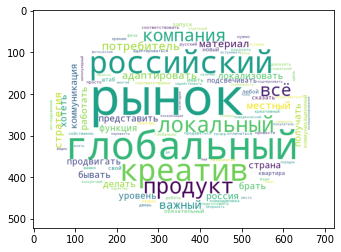

In [19]:
plt.imshow(cloud21)

### Частотные графики

In [20]:
import seaborn as sns

In [21]:
corpus=[]
new21 = df['2.1.'].str.split()
new21 = new21.values.tolist()
corpus=[word21 for i in new21 for word21 in i]

from collections import defaultdict
dic=defaultdict(int)
for word21 in corpus:
    if word21 in stop_words:
        dic[word21]+=1

In [22]:
import collections

In [23]:
from collections import Counter

<AxesSubplot:>

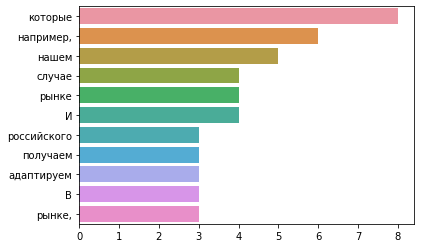

In [24]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word21,count in most[:30]:
    if (word21 not in stop_words):
        x.append(word21)
        y.append(count)

sns.barplot(x=y,y=x)

In [25]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word21, sum_words[0, idx])
                  for word21, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

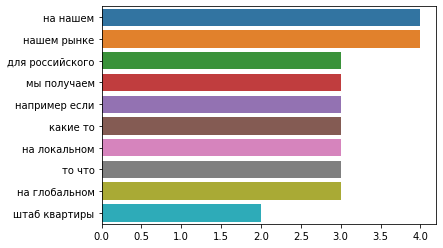

In [27]:
top_n_bigrams=get_top_ngram(df["2.1."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

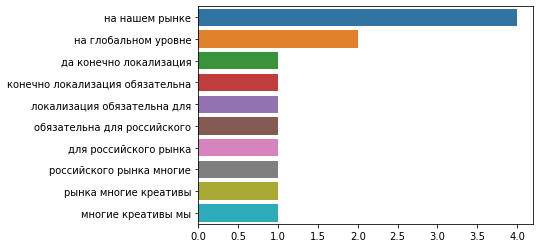

In [28]:
top_n_bigrams=get_top_ngram(df["2.1."],3)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [29]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [30]:
from textblob import TextBlob
TextBlob(text21).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [31]:
def polarity(text21):
    return TextBlob(text21).sentiment.polarity

<AxesSubplot:>

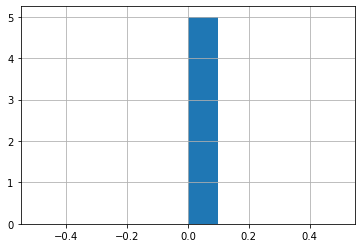

In [32]:
df['polarity_score'] = df['2.1.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 1 artists>

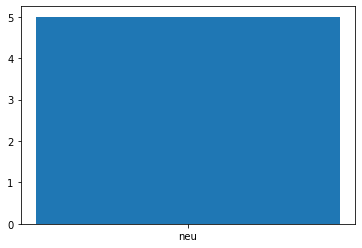

In [33]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 2.2.

### Облако слов

In [34]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [35]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pymorphy2

In [37]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [38]:
from wordcloud import WordCloud

In [39]:
import nltk as nltk

In [40]:
from nltk.tokenize import word_tokenize 

In [41]:
from nltk.corpus import stopwords

In [42]:
stop_words = stopwords.words('russian')

In [43]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [44]:
text22 = ' '.join(df['2.2.'])
text22

'Потребности самого покупателя, то есть, сначала мы анализируем, какие потребности у рынка, какие из них наиболее релевантные для нас, наиболее интересные. Также мы анализируем боли покупателей и конкурентов с целью выбора фичей, которые лучше подсветить в наших продуктах, чтобы более выигрышно смотреться на фоне конкурентов. И также анализируем современные тренды, естественно, социальные тренды. Если мы говорим, например, о создании креативов, то, естественно, очень важно, чтобы рекламные кампании и все соответствующие креативы были выполнены в стилистике актуальной для текущего времени. Мы создаём локальные креативы в том случае, если мы делаем локальную рекламу на ТВ или в наружке, потому что чаще всего штаб-квартира не предоставляет нам какой-то релевантный для российского рынка контент. Например, у нас есть определённые тех требования на нашем национальном федеральном телевидении, и сделать такой подходящий ролик по хронометражу, по требованиям канала, который соответствовал бы ро

In [45]:
text22 = word_tokenize(text22)
text22

['Потребности',
 'самого',
 'покупателя',
 ',',
 'то',
 'есть',
 ',',
 'сначала',
 'мы',
 'анализируем',
 ',',
 'какие',
 'потребности',
 'у',
 'рынка',
 ',',
 'какие',
 'из',
 'них',
 'наиболее',
 'релевантные',
 'для',
 'нас',
 ',',
 'наиболее',
 'интересные',
 '.',
 'Также',
 'мы',
 'анализируем',
 'боли',
 'покупателей',
 'и',
 'конкурентов',
 'с',
 'целью',
 'выбора',
 'фичей',
 ',',
 'которые',
 'лучше',
 'подсветить',
 'в',
 'наших',
 'продуктах',
 ',',
 'чтобы',
 'более',
 'выигрышно',
 'смотреться',
 'на',
 'фоне',
 'конкурентов',
 '.',
 'И',
 'также',
 'анализируем',
 'современные',
 'тренды',
 ',',
 'естественно',
 ',',
 'социальные',
 'тренды',
 '.',
 'Если',
 'мы',
 'говорим',
 ',',
 'например',
 ',',
 'о',
 'создании',
 'креативов',
 ',',
 'то',
 ',',
 'естественно',
 ',',
 'очень',
 'важно',
 ',',
 'чтобы',
 'рекламные',
 'кампании',
 'и',
 'все',
 'соответствующие',
 'креативы',
 'были',
 'выполнены',
 'в',
 'стилистике',
 'актуальной',
 'для',
 'текущего',
 'времени',


In [46]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [47]:
def lemmatize_text(tokens):
    text_new_22=''
    for word22 in tokens:
        word22 = lemmatizer.parse(word22)
        text_new_22 = text_new_22 + ' ' + word22[0].normal_form
    return text_new_22

In [48]:
text22 = lemmatize_text(text22)
text22

' потребность сам покупатель , то есть , сначала мы анализировать , какой потребность у рынок , какой из они наиболее релевантный для мы , наиболее интересный . также мы анализировать боль покупатель и конкурент с цель выбор фича , который хороший подсветить в наш продукт , чтобы более выигрышно смотреться на фон конкурент . и также анализировать современный тренд , естественно , социальный тренд . если мы говорить , например , о создание креатив , то , естественно , очень важно , чтобы рекламный кампания и всё соответствующий креатив быть выполнить в стилистика актуальный для текущий время . мы создавать локальный креатив в тот случай , если мы делать локальный реклама на тв или в наружка , потому что частый весь штаб-квартира не предоставлять мы какой-то релевантный для российский рынок контент . например , у мы есть определённый тот требование на наш национальный федеральный телевидение , и сделать такой подходящий ролик по хронометраж , по требование канал , который соответствовать

In [49]:
text22 = text22.lower()
text22

' потребность сам покупатель , то есть , сначала мы анализировать , какой потребность у рынок , какой из они наиболее релевантный для мы , наиболее интересный . также мы анализировать боль покупатель и конкурент с цель выбор фича , который хороший подсветить в наш продукт , чтобы более выигрышно смотреться на фон конкурент . и также анализировать современный тренд , естественно , социальный тренд . если мы говорить , например , о создание креатив , то , естественно , очень важно , чтобы рекламный кампания и всё соответствующий креатив быть выполнить в стилистика актуальный для текущий время . мы создавать локальный креатив в тот случай , если мы делать локальный реклама на тв или в наружка , потому что частый весь штаб-квартира не предоставлять мы какой-то релевантный для российский рынок контент . например , у мы есть определённый тот требование на наш национальный федеральный телевидение , и сделать такой подходящий ролик по хронометраж , по требование канал , который соответствовать

In [50]:
rec = np.array(Image.open('rec.jpg'))

In [51]:
cloud22 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=100, mask=rec).generate(text22)

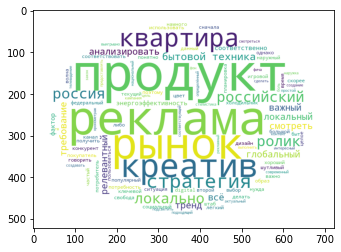

In [52]:
plt.imshow(cloud22)

### Частотные графики

In [53]:
import seaborn as sns

In [54]:
corpus=[]
new22 = df['2.2.'].str.split()
new22 = new22.values.tolist()
corpus=[word22 for i in new22 for word22 in i]

from collections import defaultdict
dic=defaultdict(int)
for word22 in corpus:
    if word22 in stop_words:
        dic[word22]+=1

In [55]:
import collections

In [56]:
from collections import Counter

<AxesSubplot:>

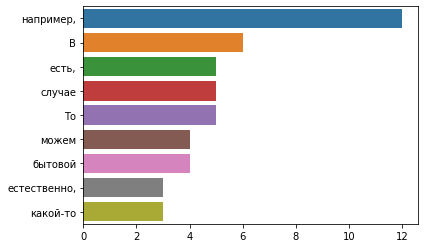

In [57]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word22,count in most[:30]:
    if (word22 not in stop_words):
        x.append(word22)
        y.append(count)

sns.barplot(x=y,y=x)

In [58]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word22, sum_words[0, idx])
                  for word22, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

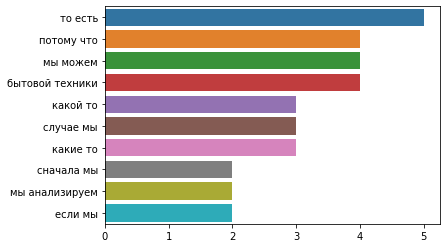

In [60]:
top_n_bigrams=get_top_ngram(df["2.2."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

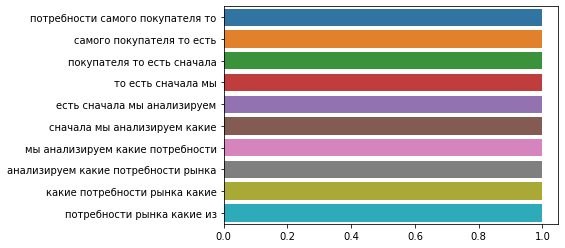

In [61]:
top_n_bigrams=get_top_ngram(df["2.2."],4)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [62]:
from textblob import TextBlob
TextBlob(text22).sentiment

Sentiment(polarity=0.0, subjectivity=0.25)

In [63]:
pip install -U textblob

In [64]:
def polarity(text22):
    return TextBlob(text22).sentiment.polarity

<AxesSubplot:>

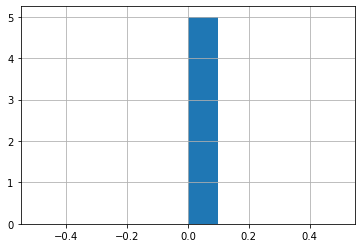

In [65]:
df['polarity_score'] = df['2.2.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 1 artists>

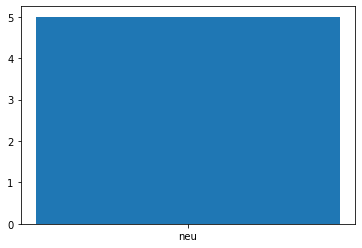

In [66]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 2.3.

### Облако слов

In [67]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [68]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [69]:
import pymorphy2

In [70]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [71]:
from wordcloud import WordCloud

In [72]:
import nltk as nltk

In [73]:
from nltk.tokenize import word_tokenize 

In [74]:
from nltk.corpus import stopwords

In [75]:
stop_words = stopwords.words('russian')

In [76]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [77]:
text23 = ' '.join(df['2.3.'])
text23

'В целом я бы сказала, что основные каналы те же самые, то есть, также мы работаем с инфлюенсерами – это по всему миру происходит. Перформанс кампании, диджитал кампании запускаются не только у нас, а по всему миру. Единственная разница – это выбор каналов зависит от целей кампании, целей бизнеса локального и от самого канала. Например, у нас есть аналоги маркетплейсов на российском рынке, естественно, мы запускаем на наших аналогах рекламные кампании.  В большинстве своем скорее нет. Единственное, я могу сказать, что у нас более популярна обычная реклама на ТВ, то есть, флайты 30, 15, 20 секунд. И, например, абсолютно непопулярен формат магазин на диване. В то время как в Америке и в странах Азии покупка в прямом эфире через звонки операторам очень развита. Мы проводили эксперимент при поддержке штаб-квартиры и пытались локально продать что-то через home shopping, то есть, через магазин на диване. Этот формат абсолютно не зашел, его никто не смотрел. А если кто-то и смотрел, то никто 

In [78]:
text23 = word_tokenize(text23)
text23

['В',
 'целом',
 'я',
 'бы',
 'сказала',
 ',',
 'что',
 'основные',
 'каналы',
 'те',
 'же',
 'самые',
 ',',
 'то',
 'есть',
 ',',
 'также',
 'мы',
 'работаем',
 'с',
 'инфлюенсерами',
 '–',
 'это',
 'по',
 'всему',
 'миру',
 'происходит',
 '.',
 'Перформанс',
 'кампании',
 ',',
 'диджитал',
 'кампании',
 'запускаются',
 'не',
 'только',
 'у',
 'нас',
 ',',
 'а',
 'по',
 'всему',
 'миру',
 '.',
 'Единственная',
 'разница',
 '–',
 'это',
 'выбор',
 'каналов',
 'зависит',
 'от',
 'целей',
 'кампании',
 ',',
 'целей',
 'бизнеса',
 'локального',
 'и',
 'от',
 'самого',
 'канала',
 '.',
 'Например',
 ',',
 'у',
 'нас',
 'есть',
 'аналоги',
 'маркетплейсов',
 'на',
 'российском',
 'рынке',
 ',',
 'естественно',
 ',',
 'мы',
 'запускаем',
 'на',
 'наших',
 'аналогах',
 'рекламные',
 'кампании',
 '.',
 'В',
 'большинстве',
 'своем',
 'скорее',
 'нет',
 '.',
 'Единственное',
 ',',
 'я',
 'могу',
 'сказать',
 ',',
 'что',
 'у',
 'нас',
 'более',
 'популярна',
 'обычная',
 'реклама',
 'на',
 'ТВ'

In [79]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [80]:
def lemmatize_text(tokens):
    text_new_23=''
    for word23 in tokens:
        word23 = lemmatizer.parse(word23)
        text_new_23 = text_new_23 + ' ' + word23[0].normal_form
    return text_new_23

In [81]:
text23 = lemmatize_text(text23)
text23

' в целое я бы сказать , что основной канал тот же самый , то есть , также мы работать с инфлюенсер – это по весь мир происходить . перформанс кампания , диджитал кампания запускаться не только у мы , а по весь мир . единственный разница – это выбор канал зависеть от цель кампания , цель бизнес локальный и от сам канал . например , у мы есть аналог маркетплейс на российский рынок , естественно , мы запускать на наш аналог рекламный кампания . в большинство свой скорее нет . единственный , я мочь сказать , что у мы более популярный обычный реклама на тв , то есть , флайта 30 , 15 , 20 секунда . и , например , абсолютно непопулярный формат магазин на диван . в то время как в америка и в страна азия покупка в прямой эфир через звонок оператор очень развить . мы проводить эксперимент при поддержка штаб-квартира и пытаться локально продать что-то через home shopping , то есть , через магазин на диван . этот формат абсолютно не зайти , он никто не смотреть . а если кто-то и смотреть , то ник

In [82]:
text23 = text23.lower()
text23

' в целое я бы сказать , что основной канал тот же самый , то есть , также мы работать с инфлюенсер – это по весь мир происходить . перформанс кампания , диджитал кампания запускаться не только у мы , а по весь мир . единственный разница – это выбор канал зависеть от цель кампания , цель бизнес локальный и от сам канал . например , у мы есть аналог маркетплейс на российский рынок , естественно , мы запускать на наш аналог рекламный кампания . в большинство свой скорее нет . единственный , я мочь сказать , что у мы более популярный обычный реклама на тв , то есть , флайта 30 , 15 , 20 секунда . и , например , абсолютно непопулярный формат магазин на диван . в то время как в америка и в страна азия покупка в прямой эфир через звонок оператор очень развить . мы проводить эксперимент при поддержка штаб-квартира и пытаться локально продать что-то через home shopping , то есть , через магазин на диван . этот формат абсолютно не зайти , он никто не смотреть . а если кто-то и смотреть , то ник

In [83]:
rec = np.array(Image.open('rec.jpg'))

In [84]:
cloud23 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=60, mask=rec).generate(text23)

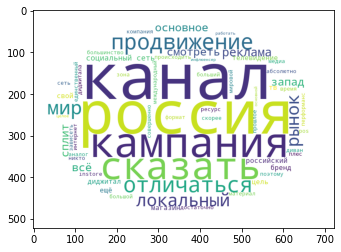

In [85]:
plt.imshow(cloud23)

### Частотные графики

In [86]:
import seaborn as sns

In [87]:
corpus=[]
new23 = df['2.3.'].str.split()
new23 = new23.values.tolist()
corpus=[word23 for i in new23 for word23 in i]

from collections import defaultdict
dic=defaultdict(int)
for word23 in corpus:
    if word23 in stop_words:
        dic[word23]+=1

In [88]:
import collections

In [89]:
from collections import Counter

<AxesSubplot:>

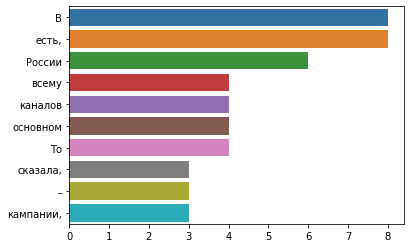

In [90]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word23,count in most[:30]:
    if (word23 not in stop_words):
        x.append(word23)
        y.append(count)

sns.barplot(x=y,y=x)

In [91]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word23, sum_words[0, idx])
                  for word23, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

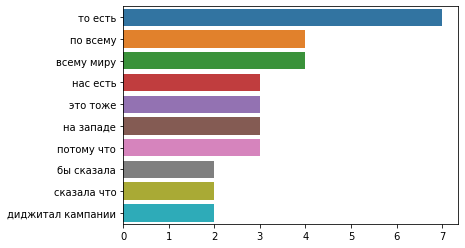

In [93]:
top_n_bigrams=get_top_ngram(df["2.3."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

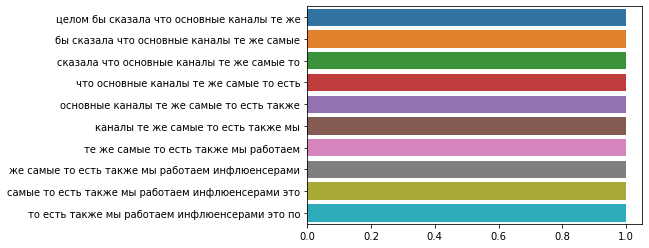

In [94]:
top_n_bigrams=get_top_ngram(df["2.3."],8)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [95]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [96]:
from textblob import TextBlob
TextBlob(text23).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [97]:
def polarity(text23):
    return TextBlob(text23).sentiment.polarity

<AxesSubplot:>

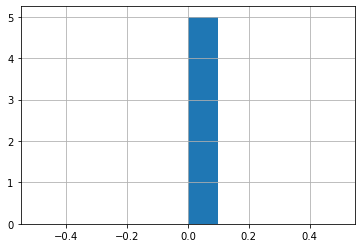

In [98]:
df['polarity_score'] = df['2.3.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 1 artists>

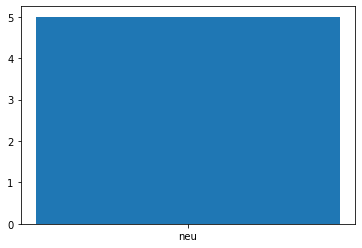

In [99]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 2.4.

### Облако слов

In [100]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [101]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [102]:
import pymorphy2

In [103]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [104]:
from wordcloud import WordCloud

In [105]:
import nltk as nltk

In [106]:
from nltk.tokenize import word_tokenize 

In [107]:
from nltk.corpus import stopwords

In [108]:
stop_words = stopwords.words('russian')

In [109]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [110]:
text24 = ' '.join(df['2.4.'])
text24

'В зависимости от страны. Если, например, сравнивать локальные креативы у нас и в Европе, особенно в Италии и Испании, то креативы будут разные. Все зависит от культуры, от местных трендов, от влияние инфлюенсеров, предпочтения самих потребителей и т.д. Если же мы сравниваем себя со странами Средней Азии, то, как правило, это идёт копирование наших креативов, либо же их местный креатив, но, в том числе, сфокусированный на наши предпочтения, то есть, в основном они похожи. Хотелось бы ещё больше адаптировать креативы, это зависит от бюджетов и разрешения адаптации от штаб-квартиры, насколько сильно можно адаптировать. В текущей ситуации слишком большое влияние идёт от штаб-квартиры, и все креативы проходят согласование. Понятное дело, мы находимся в некоторых узких рамках. По возможности сделали бы креативы более релевантными и понятными для российского потребителя.  Как я говорила ранее, креативные материалы отличаются существенно в случае ТВ и наружки. Потому что тех требования варьир

In [111]:
text24 = word_tokenize(text24)
text24

['В',
 'зависимости',
 'от',
 'страны',
 '.',
 'Если',
 ',',
 'например',
 ',',
 'сравнивать',
 'локальные',
 'креативы',
 'у',
 'нас',
 'и',
 'в',
 'Европе',
 ',',
 'особенно',
 'в',
 'Италии',
 'и',
 'Испании',
 ',',
 'то',
 'креативы',
 'будут',
 'разные',
 '.',
 'Все',
 'зависит',
 'от',
 'культуры',
 ',',
 'от',
 'местных',
 'трендов',
 ',',
 'от',
 'влияние',
 'инфлюенсеров',
 ',',
 'предпочтения',
 'самих',
 'потребителей',
 'и',
 'т.д',
 '.',
 'Если',
 'же',
 'мы',
 'сравниваем',
 'себя',
 'со',
 'странами',
 'Средней',
 'Азии',
 ',',
 'то',
 ',',
 'как',
 'правило',
 ',',
 'это',
 'идёт',
 'копирование',
 'наших',
 'креативов',
 ',',
 'либо',
 'же',
 'их',
 'местный',
 'креатив',
 ',',
 'но',
 ',',
 'в',
 'том',
 'числе',
 ',',
 'сфокусированный',
 'на',
 'наши',
 'предпочтения',
 ',',
 'то',
 'есть',
 ',',
 'в',
 'основном',
 'они',
 'похожи',
 '.',
 'Хотелось',
 'бы',
 'ещё',
 'больше',
 'адаптировать',
 'креативы',
 ',',
 'это',
 'зависит',
 'от',
 'бюджетов',
 'и',
 'разре

In [112]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [113]:
def lemmatize_text(tokens):
    text_new_24=''
    for word24 in tokens:
        word24 = lemmatizer.parse(word24)
        text_new_24 = text_new_24 + ' ' + word24[0].normal_form
    return text_new_24

In [114]:
text24 = lemmatize_text(text24)
text24

' в зависимость от страна . если , например , сравнивать локальный креатив у мы и в европа , особенно в италия и испания , то креатив быть разный . всё зависеть от культура , от местный тренд , от влияние инфлюенсер , предпочтение сам потребитель и т.д . если же мы сравнивать себя с страна средний азия , то , как правило , это идти копирование наш креатив , либо же они местный креатив , но , в тот число , сфокусировать на наш предпочтение , то есть , в основное они похожий . хотеться бы ещё большой адаптировать креатив , это зависеть от бюджет и разрешение адаптация от штаб-квартира , насколько сильно можно адаптировать . в текущий ситуация слишком большой влияние идти от штаб-квартира , и всё креатив проходить согласование . понятный дело , мы находиться в некоторый узкий рамка . по возможность сделать бы креатив более релевантный и понятный для российский потребитель . как я говорить ранее , креативный материал отличаться существенно в случай тв и наружка . потому что тот требование 

In [115]:
text24 = text24.lower()
text24

' в зависимость от страна . если , например , сравнивать локальный креатив у мы и в европа , особенно в италия и испания , то креатив быть разный . всё зависеть от культура , от местный тренд , от влияние инфлюенсер , предпочтение сам потребитель и т.д . если же мы сравнивать себя с страна средний азия , то , как правило , это идти копирование наш креатив , либо же они местный креатив , но , в тот число , сфокусировать на наш предпочтение , то есть , в основное они похожий . хотеться бы ещё большой адаптировать креатив , это зависеть от бюджет и разрешение адаптация от штаб-квартира , насколько сильно можно адаптировать . в текущий ситуация слишком большой влияние идти от штаб-квартира , и всё креатив проходить согласование . понятный дело , мы находиться в некоторый узкий рамка . по возможность сделать бы креатив более релевантный и понятный для российский потребитель . как я говорить ранее , креативный материал отличаться существенно в случай тв и наружка . потому что тот требование 

In [116]:
rec = np.array(Image.open('rec.jpg'))

In [117]:
cloud24 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=60, mask=rec).generate(text24)

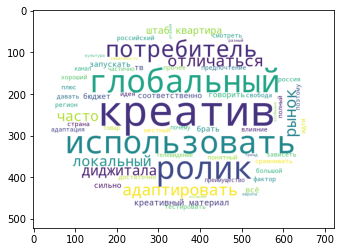

In [118]:
plt.imshow(cloud24)

### Частотные графики

In [119]:
import seaborn as sns

In [120]:
corpus=[]
new24 = df['2.4.'].str.split()
new24 = new24.values.tolist()
corpus=[word23 for i in new23 for word24 in i]

from collections import defaultdict
dic=defaultdict(int)
for word24 in corpus:
    if word24 in stop_words:
        dic[word24]+=1

In [121]:
import collections

In [122]:
from collections import Counter

In [124]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word24, sum_words[0, idx])
                  for word24, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

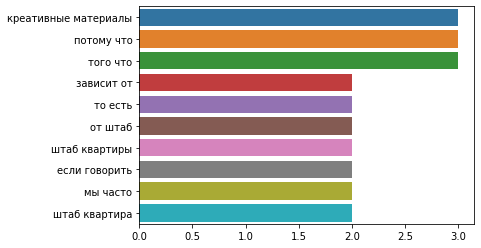

In [126]:
top_n_bigrams=get_top_ngram(df["2.4."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

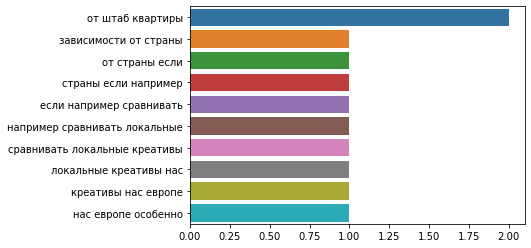

In [127]:
top_n_bigrams=get_top_ngram(df["2.4."],3)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [128]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [129]:
from textblob import TextBlob
TextBlob(text24).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [130]:
def polarity(text24):
    return TextBlob(text24).sentiment.polarity

<AxesSubplot:>

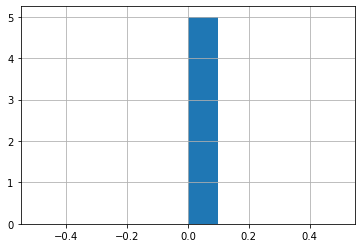

In [131]:
df['polarity_score'] = df['2.4.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 1 artists>

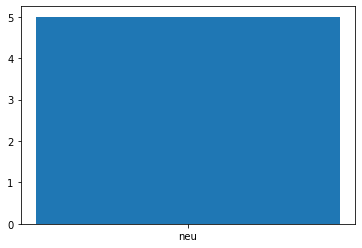

In [132]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 3.1. и 3.3.

### Облако слов

In [133]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [134]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [135]:
import pymorphy2

In [136]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [137]:
from wordcloud import WordCloud

In [138]:
import nltk as nltk

In [139]:
from nltk.tokenize import word_tokenize 

In [140]:
from nltk.corpus import stopwords

In [141]:
stop_words = stopwords.words('russian')

In [142]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [143]:
text31 = ' '.join(df['3.1.'])
text31

'У нас есть бренд буки, общие у компании, которые распространяются на все суббренды в компании А. Это некоторый образец, от которого мы исходим. Дальше при запуске определённого суббренда, линейки или определённого продукта выходит рекомендованная коммуникационная стратегия от штаб-квартиры. Как правило, она в очень простом виде, включает в себя, в основном, ограничения: что нельзя показывать, что можно показывать и что лучше всего подчеркнуть. Все эти материалы передаются менеджеру, и менеджер уже с точки зрения местного рынка придумывает слоган, возможные креативы, детали коммуникационной стратегии. В том числе в каких каналах стоит подсветить, каким образом, какие из текущих креативов можно использовать, либо, если их недостаточно, в каком формате лучше доснять. Далее уже креативы на этапе брифа согласовываются со штаб-квартирой. В формате идеи этот креатив согласовывается у юристов и у штаб-квартиры. Если согласование успешно пройдено, бриф передаётся в исполнение, креатив подготав

In [144]:
text31 = word_tokenize(text31)
text31

['У',
 'нас',
 'есть',
 'бренд',
 'буки',
 ',',
 'общие',
 'у',
 'компании',
 ',',
 'которые',
 'распространяются',
 'на',
 'все',
 'суббренды',
 'в',
 'компании',
 'А.',
 'Это',
 'некоторый',
 'образец',
 ',',
 'от',
 'которого',
 'мы',
 'исходим',
 '.',
 'Дальше',
 'при',
 'запуске',
 'определённого',
 'суббренда',
 ',',
 'линейки',
 'или',
 'определённого',
 'продукта',
 'выходит',
 'рекомендованная',
 'коммуникационная',
 'стратегия',
 'от',
 'штаб-квартиры',
 '.',
 'Как',
 'правило',
 ',',
 'она',
 'в',
 'очень',
 'простом',
 'виде',
 ',',
 'включает',
 'в',
 'себя',
 ',',
 'в',
 'основном',
 ',',
 'ограничения',
 ':',
 'что',
 'нельзя',
 'показывать',
 ',',
 'что',
 'можно',
 'показывать',
 'и',
 'что',
 'лучше',
 'всего',
 'подчеркнуть',
 '.',
 'Все',
 'эти',
 'материалы',
 'передаются',
 'менеджеру',
 ',',
 'и',
 'менеджер',
 'уже',
 'с',
 'точки',
 'зрения',
 'местного',
 'рынка',
 'придумывает',
 'слоган',
 ',',
 'возможные',
 'креативы',
 ',',
 'детали',
 'коммуникационной',

In [145]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [146]:
def lemmatize_text(tokens):
    text_new_31=''
    for word31 in tokens:
        word31 = lemmatizer.parse(word31)
        text_new_31 = text_new_31 + ' ' + word31[0].normal_form
    return text_new_31

In [147]:
text31 = lemmatize_text(text31)
text31

' у мы есть бренд бук , общий у компания , который распространяться на всё суббренд в компания а. это некоторый образец , от который мы исходить . далёкий при запуск определённый суббренд , линейка или определённый продукт выходить рекомендовать коммуникационный стратегия от штаб-квартира . как правило , она в очень простой вид , включать в себя , в основное , ограничение : что нельзя показывать , что можно показывать и что хороший весь подчеркнуть . всё этот материал передаваться менеджер , и менеджер уже с точка зрение местный рынок придумывать слоган , возможный креатив , деталь коммуникационный стратегия . в тот число в какой канал стоить подсветить , какой образ , какой из текущий креатив можно использовать , либо , если они недостаточно , в какой формат хороший доснять . далее уже креатив на этап бриф согласовываться с штаб-квартира . в формат идея этот креатив согласовываться у юрист и у штаб-квартира . если согласование успешно пройти , бриф передаваться в исполнение , креатив 

In [148]:
text31 = text31.lower()
text31

' у мы есть бренд бук , общий у компания , который распространяться на всё суббренд в компания а. это некоторый образец , от который мы исходить . далёкий при запуск определённый суббренд , линейка или определённый продукт выходить рекомендовать коммуникационный стратегия от штаб-квартира . как правило , она в очень простой вид , включать в себя , в основное , ограничение : что нельзя показывать , что можно показывать и что хороший весь подчеркнуть . всё этот материал передаваться менеджер , и менеджер уже с точка зрение местный рынок придумывать слоган , возможный креатив , деталь коммуникационный стратегия . в тот число в какой канал стоить подсветить , какой образ , какой из текущий креатив можно использовать , либо , если они недостаточно , в какой формат хороший доснять . далее уже креатив на этап бриф согласовываться с штаб-квартира . в формат идея этот креатив согласовываться у юрист и у штаб-квартира . если согласование успешно пройти , бриф передаваться в исполнение , креатив 

In [149]:
rec = np.array(Image.open('rec.jpg'))

In [150]:
cloud31 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=100, mask=rec).generate(text31)

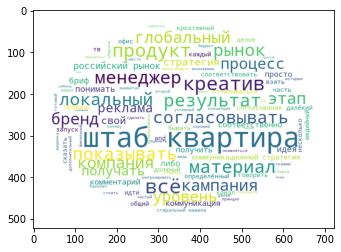

In [151]:
plt.imshow(cloud31)

### Частотные графики

In [152]:
import seaborn as sns

In [153]:
corpus=[]
new31 = df['3.1.'].str.split()
new31 = new31.values.tolist()
corpus=[word31 for i in new31 for word31 in i]

from collections import defaultdict
dic=defaultdict(int)
for word31 in corpus:
    if word31 in stop_words:
        dic[word31]+=1

In [154]:
import collections

In [155]:
from collections import Counter

<AxesSubplot:>

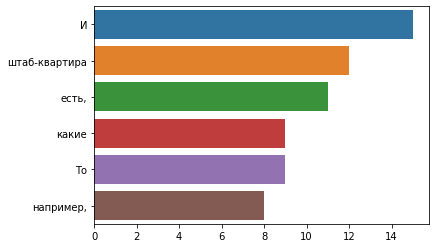

In [156]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word31,count in most[:30]:
    if (word31 not in stop_words):
        x.append(word31)
        y.append(count)

sns.barplot(x=y,y=x)

In [157]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [158]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word31, sum_words[0, idx])
                  for word31, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

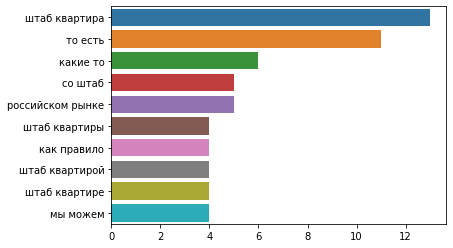

In [159]:
top_n_bigrams=get_top_ngram(df["3.1."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

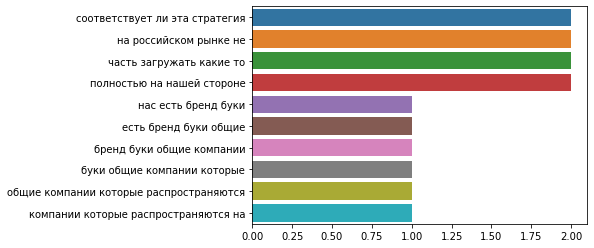

In [160]:
top_n_bigrams=get_top_ngram(df["3.1."],4)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [161]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [162]:
from textblob import TextBlob
TextBlob(text31).sentiment

Sentiment(polarity=0.3333333333333333, subjectivity=0.4583333333333333)

In [163]:
def polarity(text31):
    return TextBlob(text31).sentiment.polarity

<AxesSubplot:>

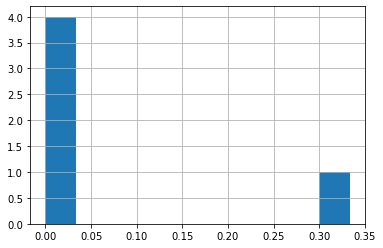

In [164]:
df['polarity_score'] = df['3.1.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 2 artists>

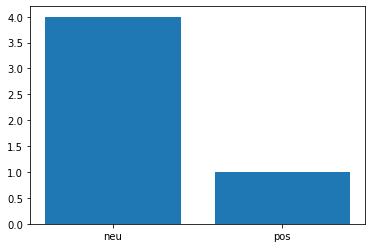

In [165]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 3.2.

### Облако слов

In [166]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [167]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [168]:
import pymorphy2

In [169]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [170]:
from wordcloud import WordCloud

In [171]:
import nltk as nltk

In [172]:
from nltk.tokenize import word_tokenize 

In [173]:
from nltk.corpus import stopwords

In [174]:
stop_words = stopwords.words('russian')

In [175]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [176]:
text32 = ' '.join(df['3.2.'])
text32

'И да, и нет. С одной стороны, у нас есть глобальный договор, согласно которому мы обязаны работать с некоторыми агентствами. Так как сетка агентств, как правило, большая и на определённых рынках, в определённых странах есть некоторые агентства, которые входят в эту сетку, здесь мы можем выбирать. Какое именно из медиа агентств, креативных агентств нам подходит. На текущий момент, мы довольно долго, более 5 лет, работаем с 1 медийным агентством.  Да, у нас есть мировой контракт, и мы подключены к российскому офису глобального медийного агентства. Большинство наших агентств, которые были отобраны в результатах тендера, это глобальные агентства. У них тоже офис находится глобально, во множестве стран. И, как правило, головной офис тоже находится за границей.  Да. Да, все верно. Медийное агентство – глобальное, креативные агентства могут меняться.'

In [177]:
text32 = word_tokenize(text32)
text32

['И',
 'да',
 ',',
 'и',
 'нет',
 '.',
 'С',
 'одной',
 'стороны',
 ',',
 'у',
 'нас',
 'есть',
 'глобальный',
 'договор',
 ',',
 'согласно',
 'которому',
 'мы',
 'обязаны',
 'работать',
 'с',
 'некоторыми',
 'агентствами',
 '.',
 'Так',
 'как',
 'сетка',
 'агентств',
 ',',
 'как',
 'правило',
 ',',
 'большая',
 'и',
 'на',
 'определённых',
 'рынках',
 ',',
 'в',
 'определённых',
 'странах',
 'есть',
 'некоторые',
 'агентства',
 ',',
 'которые',
 'входят',
 'в',
 'эту',
 'сетку',
 ',',
 'здесь',
 'мы',
 'можем',
 'выбирать',
 '.',
 'Какое',
 'именно',
 'из',
 'медиа',
 'агентств',
 ',',
 'креативных',
 'агентств',
 'нам',
 'подходит',
 '.',
 'На',
 'текущий',
 'момент',
 ',',
 'мы',
 'довольно',
 'долго',
 ',',
 'более',
 '5',
 'лет',
 ',',
 'работаем',
 'с',
 '1',
 'медийным',
 'агентством',
 '.',
 'Да',
 ',',
 'у',
 'нас',
 'есть',
 'мировой',
 'контракт',
 ',',
 'и',
 'мы',
 'подключены',
 'к',
 'российскому',
 'офису',
 'глобального',
 'медийного',
 'агентства',
 '.',
 'Большинство

In [178]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [179]:
def lemmatize_text(tokens):
    text_new_32=''
    for word32 in tokens:
        word32 = lemmatizer.parse(word32)
        text_new_32 = text_new_32 + ' ' + word32[0].normal_form
    return text_new_32

In [180]:
text32 = lemmatize_text(text32)
text32

' и да , и нет . с один сторона , у мы есть глобальный договор , согласно который мы обязать работать с некоторый агентство . так как сетка агентство , как правило , больший и на определённый рынок , в определённый страна есть некоторый агентство , который входить в этот сетка , здесь мы мочь выбирать . какой именно из медиа агентство , креативный агентство мы подходить . на текущий момент , мы довольно долго , более 5 год , работать с 1 медийный агентство . да , у мы есть мировой контракт , и мы подключить к российский офис глобальный медийный агентство . большинство наш агентство , который быть отобрать в результат тендер , это глобальный агентство . у они тоже офис находиться глобально , в множество страна . и , как правило , головной офис тоже находиться за граница . да . да , всё верно . медийный агентство – глобальный , креативный агентство мочь меняться .'

In [181]:
text32 = text32.lower()
text32

' и да , и нет . с один сторона , у мы есть глобальный договор , согласно который мы обязать работать с некоторый агентство . так как сетка агентство , как правило , больший и на определённый рынок , в определённый страна есть некоторый агентство , который входить в этот сетка , здесь мы мочь выбирать . какой именно из медиа агентство , креативный агентство мы подходить . на текущий момент , мы довольно долго , более 5 год , работать с 1 медийный агентство . да , у мы есть мировой контракт , и мы подключить к российский офис глобальный медийный агентство . большинство наш агентство , который быть отобрать в результат тендер , это глобальный агентство . у они тоже офис находиться глобально , в множество страна . и , как правило , головной офис тоже находиться за граница . да . да , всё верно . медийный агентство – глобальный , креативный агентство мочь меняться .'

In [182]:
rec = np.array(Image.open('rec.jpg'))

In [183]:
cloud32 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=100, mask=rec).generate(text32)

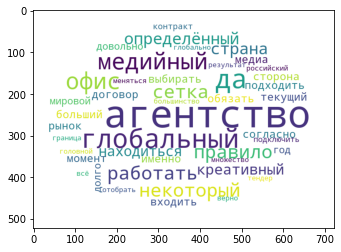

In [184]:
plt.imshow(cloud32)

### Частотные графики

In [185]:
import seaborn as sns

In [186]:
corpus=[]
new32 = df['3.2.'].str.split()
new32 = new32.values.tolist()
corpus=[word32 for i in new32 for word32 in i]

from collections import defaultdict
dic=defaultdict(int)
for word32 in corpus:
    if word32 in stop_words:
        dic[word32]+=1

In [187]:
import collections

In [188]:
from collections import Counter

<AxesSubplot:>

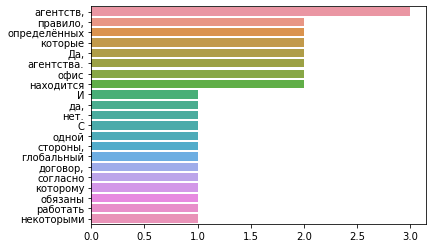

In [189]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word32,count in most[:30]:
    if (word32 not in stop_words):
        x.append(word32)
        y.append(count)

sns.barplot(x=y,y=x)

In [190]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [191]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word32, sum_words[0, idx])
                  for word32, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

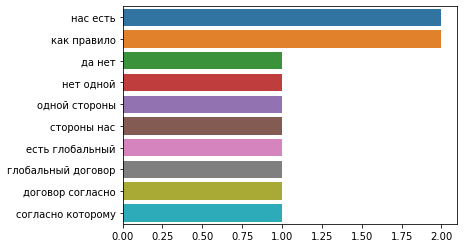

In [192]:
top_n_bigrams=get_top_ngram(df["3.2."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

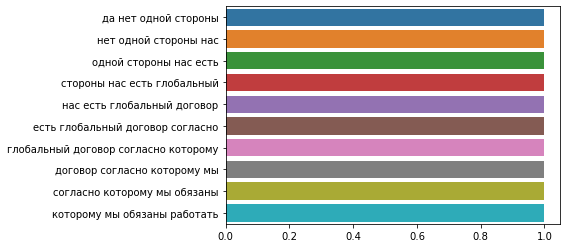

In [193]:
top_n_bigrams=get_top_ngram(df["3.2."],4)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [194]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [195]:
from textblob import TextBlob
TextBlob(text32).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [196]:
def polarity(text32):
    return TextBlob(text31).sentiment.polarity

<AxesSubplot:>

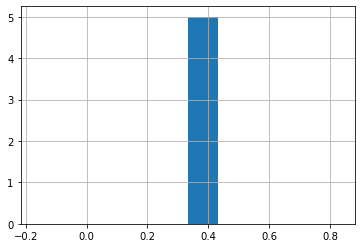

In [197]:
df['polarity_score'] = df['3.2.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 1 artists>

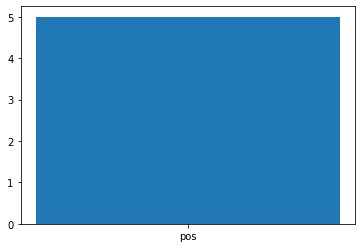

In [198]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 4.1.

### Облако слов

In [199]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [200]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [201]:
import pymorphy2

In [202]:
pip install wordcloud 

In [203]:
from wordcloud import WordCloud

In [204]:
import nltk as nltk

In [205]:
from nltk.tokenize import word_tokenize 

In [206]:
from nltk.corpus import stopwords

In [207]:
stop_words = stopwords.words('russian')

In [208]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [209]:
text41 = ' '.join(df['4.1.'])
text41

'Я бы тоже разделила на блоки. Стандартизация требуется для демонстрации взаимодействия с продуктами. Например, если в креативах любого характера, это может фото, видео, музыка и т.д., каким-то образом есть взаимодействие с продуктом, то как правильно его держать, с каких ракурсов показывать, в разобранном или неразобранном состоянии, само взаимодействие определяет штаб-квартира. Потому что есть глобальные гайды и виденье штаб-квартиры, как продукт стоит показывать и как его не стоит показывать. Продукт должен использоваться только по его назначению, какие-то другие креативные пути недопустимы. В остальном конкретных рамок в принципе нет, у нас нет гайдов, каких амбассадоров мы используем, каких не используем. Как правило, за это отвечает PR отдел. Но несмотря на то, что чётких рамок нет, репутацию любого амбассадора лучше проверять. Если на данный момент со стороны амбассадора исходит много негатива, либо, наоборот, по отношению к нему, если отсутствует поддержка общественности, либо 

In [210]:
text41 = word_tokenize(text41)
text41

['Я',
 'бы',
 'тоже',
 'разделила',
 'на',
 'блоки',
 '.',
 'Стандартизация',
 'требуется',
 'для',
 'демонстрации',
 'взаимодействия',
 'с',
 'продуктами',
 '.',
 'Например',
 ',',
 'если',
 'в',
 'креативах',
 'любого',
 'характера',
 ',',
 'это',
 'может',
 'фото',
 ',',
 'видео',
 ',',
 'музыка',
 'и',
 'т.д.',
 ',',
 'каким-то',
 'образом',
 'есть',
 'взаимодействие',
 'с',
 'продуктом',
 ',',
 'то',
 'как',
 'правильно',
 'его',
 'держать',
 ',',
 'с',
 'каких',
 'ракурсов',
 'показывать',
 ',',
 'в',
 'разобранном',
 'или',
 'неразобранном',
 'состоянии',
 ',',
 'само',
 'взаимодействие',
 'определяет',
 'штаб-квартира',
 '.',
 'Потому',
 'что',
 'есть',
 'глобальные',
 'гайды',
 'и',
 'виденье',
 'штаб-квартиры',
 ',',
 'как',
 'продукт',
 'стоит',
 'показывать',
 'и',
 'как',
 'его',
 'не',
 'стоит',
 'показывать',
 '.',
 'Продукт',
 'должен',
 'использоваться',
 'только',
 'по',
 'его',
 'назначению',
 ',',
 'какие-то',
 'другие',
 'креативные',
 'пути',
 'недопустимы',
 '.',

In [211]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [212]:
def lemmatize_text(tokens):
    text_new_41=''
    for word41 in tokens:
        word41 = lemmatizer.parse(word41)
        text_new_41 = text_new_41 + ' ' + word41[0].normal_form
    return text_new_41

In [213]:
text41 = lemmatize_text(text41)
text41

' я бы тоже разделить на блок . стандартизация требоваться для демонстрация взаимодействие с продукт . например , если в креатив любой характер , это мочь фото , видео , музыка и т.д. , какой-то образ есть взаимодействие с продукт , то как правильно он держать , с какой ракурс показывать , в разобрать или неразобранный состояние , сам взаимодействие определять штаб-квартира . потому что есть глобальный гайда и видение штаб-квартира , как продукт стоить показывать и как он не стоить показывать . продукт должный использоваться только по он назначение , какой-то другой креативный путь недопустимый . в остальной конкретный рамка в принцип нет , у мы нет гайдов , какой амбассадор мы использовать , какой не использовать . как правило , за это отвечать pr отдел . но несмотря на то , что чёткий рамка нет , репутация любой амбассадор хороший проверять . если на данный момент с сторона амбассадор исходить много негатив , либо , наоборот , по отношение к он , если отсутствовать поддержка обществе

In [214]:
text41 = text41.lower()
text41

' я бы тоже разделить на блок . стандартизация требоваться для демонстрация взаимодействие с продукт . например , если в креатив любой характер , это мочь фото , видео , музыка и т.д. , какой-то образ есть взаимодействие с продукт , то как правильно он держать , с какой ракурс показывать , в разобрать или неразобранный состояние , сам взаимодействие определять штаб-квартира . потому что есть глобальный гайда и видение штаб-квартира , как продукт стоить показывать и как он не стоить показывать . продукт должный использоваться только по он назначение , какой-то другой креативный путь недопустимый . в остальной конкретный рамка в принцип нет , у мы нет гайдов , какой амбассадор мы использовать , какой не использовать . как правило , за это отвечать pr отдел . но несмотря на то , что чёткий рамка нет , репутация любой амбассадор хороший проверять . если на данный момент с сторона амбассадор исходить много негатив , либо , наоборот , по отношение к он , если отсутствовать поддержка обществе

In [215]:
rec = np.array(Image.open('rec.jpg'))

In [216]:
cloud41 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=50, mask=rec).generate(text41)

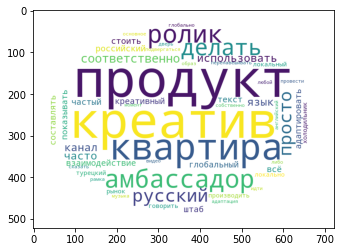

In [217]:
plt.imshow(cloud41)

### Частотные графики

In [218]:
import seaborn as sns

In [219]:
corpus=[]
new41 = df['4.1.'].str.split()
new41 = new41.values.tolist()
corpus=[word41 for i in new41 for word41 in i]

from collections import defaultdict
dic=defaultdict(int)
for word41 in corpus:
    if word41 in stop_words:
        dic[word41]+=1

In [220]:
import collections

In [221]:
from collections import Counter

<AxesSubplot:>

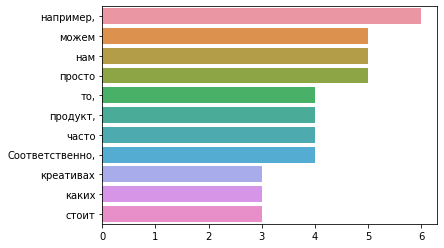

In [222]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word41,count in most[:30]:
    if (word41 not in stop_words):
        x.append(word41)
        y.append(count)

sns.barplot(x=y,y=x)

In [223]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [224]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word41, sum_words[0, idx])
                  for word41, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

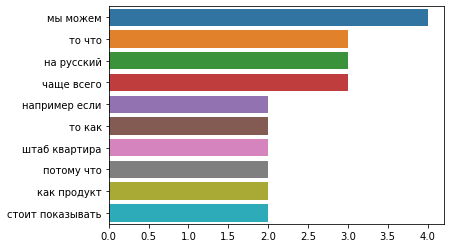

In [225]:
top_n_bigrams=get_top_ngram(df["4.1."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

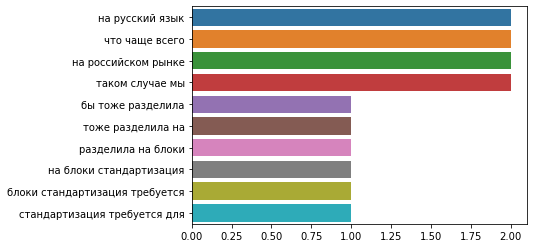

In [226]:
top_n_bigrams=get_top_ngram(df["4.1."],3)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [227]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [228]:
from textblob import TextBlob
TextBlob(text41).sentiment

Sentiment(polarity=0.0, subjectivity=0.5)

In [229]:
def polarity(text41):
    return TextBlob(text41).sentiment.polarity

<AxesSubplot:>

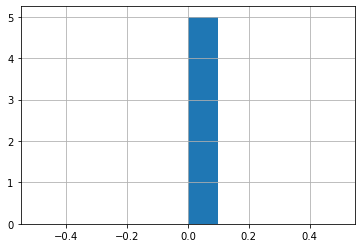

In [230]:
df['polarity_score'] = df['4.1.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 1 artists>

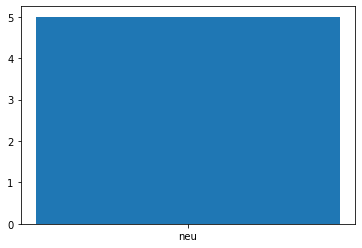

In [231]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 4.2.

### Облако слов

In [232]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [233]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [234]:
import pymorphy2

In [235]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [236]:
from wordcloud import WordCloud

In [237]:
import nltk as nltk

In [238]:
from nltk.tokenize import word_tokenize 

In [239]:
from nltk.corpus import stopwords

In [240]:
stop_words = stopwords.words('russian')

In [241]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [242]:
text42 = ' '.join(df['4.2.'])
text42

'Мы всегда переводим, креативы всегда пригождаются. У нас большое количество кампаний. Если они не пригодились в ближайшей, то они всё равно могут пригодиться через год, через полгода и т.д. Но текст мы переводим не под копирку, то есть, это не прям чистый перевод с английского или корейского языков, это локализованная версия. То есть, мы можем изменять не только порядок слов и определённые значения, но мы можем целиком поменять, например, слоган, если он не подходит для российского рынка.  Да, это обязательное правило по российским законам. Обязательно. Мы креативный материал, в том числе, через юристов пропускаем и, естественно, они не дадут отправить материал на просторы интернета не на русском языке, а только на русском. Если там есть какой-то запатентованное название, товарный знак на английском языке, мы обязаны дать ссылку. Неважно, будь то видео или статьи это должен быть переведенный текст. Да, все материалы переводятся, не переводятся только утвержденные товарные знаки. Да, а

In [243]:
text42 = word_tokenize(text42)
text42

['Мы',
 'всегда',
 'переводим',
 ',',
 'креативы',
 'всегда',
 'пригождаются',
 '.',
 'У',
 'нас',
 'большое',
 'количество',
 'кампаний',
 '.',
 'Если',
 'они',
 'не',
 'пригодились',
 'в',
 'ближайшей',
 ',',
 'то',
 'они',
 'всё',
 'равно',
 'могут',
 'пригодиться',
 'через',
 'год',
 ',',
 'через',
 'полгода',
 'и',
 'т.д',
 '.',
 'Но',
 'текст',
 'мы',
 'переводим',
 'не',
 'под',
 'копирку',
 ',',
 'то',
 'есть',
 ',',
 'это',
 'не',
 'прям',
 'чистый',
 'перевод',
 'с',
 'английского',
 'или',
 'корейского',
 'языков',
 ',',
 'это',
 'локализованная',
 'версия',
 '.',
 'То',
 'есть',
 ',',
 'мы',
 'можем',
 'изменять',
 'не',
 'только',
 'порядок',
 'слов',
 'и',
 'определённые',
 'значения',
 ',',
 'но',
 'мы',
 'можем',
 'целиком',
 'поменять',
 ',',
 'например',
 ',',
 'слоган',
 ',',
 'если',
 'он',
 'не',
 'подходит',
 'для',
 'российского',
 'рынка',
 '.',
 'Да',
 ',',
 'это',
 'обязательное',
 'правило',
 'по',
 'российским',
 'законам',
 '.',
 'Обязательно',
 '.',
 'Мы',

In [244]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [245]:
def lemmatize_text(tokens):
    text_new_42=''
    for word42 in tokens:
        word42 = lemmatizer.parse(word42)
        text_new_42 = text_new_42 + ' ' + word42[0].normal_form
    return text_new_42

In [246]:
text42 = lemmatize_text(text42)
text42

' мы всегда переводить , креатив всегда пригождаться . у мы большой количество кампания . если они не пригодиться в близкий , то они всё равно мочь пригодиться через год , через полгода и т.д . но текст мы переводить не под копирка , то есть , это не прям чистый перевод с английский или корейский язык , это локализовать версия . то есть , мы мочь изменять не только порядок слово и определённый значение , но мы мочь целиком поменять , например , слоган , если он не подходить для российский рынок . да , это обязательный правило по российский закон . обязательно . мы креативный материал , в тот число , через юрист пропускать и , естественно , они не дать отправить материал на простор интернет не на русский язык , а только на русский . если там есть какой-то запатентовать название , товарный знак на английский язык , мы обязать дать ссылка . неважно , быть то видео или статья это должный быть перевести текст . да , всё материал переводиться , не переводиться только утвердить товарный знак 

In [247]:
text42 = text42.lower()
text42

' мы всегда переводить , креатив всегда пригождаться . у мы большой количество кампания . если они не пригодиться в близкий , то они всё равно мочь пригодиться через год , через полгода и т.д . но текст мы переводить не под копирка , то есть , это не прям чистый перевод с английский или корейский язык , это локализовать версия . то есть , мы мочь изменять не только порядок слово и определённый значение , но мы мочь целиком поменять , например , слоган , если он не подходить для российский рынок . да , это обязательный правило по российский закон . обязательно . мы креативный материал , в тот число , через юрист пропускать и , естественно , они не дать отправить материал на простор интернет не на русский язык , а только на русский . если там есть какой-то запатентовать название , товарный знак на английский язык , мы обязать дать ссылка . неважно , быть то видео или статья это должный быть перевести текст . да , всё материал переводиться , не переводиться только утвердить товарный знак 

In [248]:
rec = np.array(Image.open('rec.jpg'))

In [249]:
cloud42 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=50, mask=rec).generate(text42)

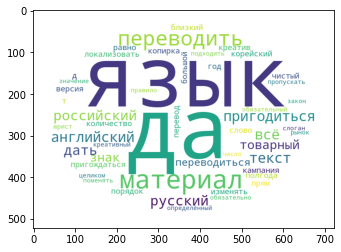

In [250]:
plt.imshow(cloud42)

### Частотные графики

In [251]:
import seaborn as sns

In [252]:
corpus=[]
new42 = df['4.2.'].str.split()
new42 = new42.values.tolist()
corpus=[word42 for i in new42 for word42 in i]

from collections import defaultdict
dic=defaultdict(int)
for word42 in corpus:
    if word42 in stop_words:
        dic[word42]+=1

In [253]:
import collections

In [254]:
from collections import Counter

<AxesSubplot:>

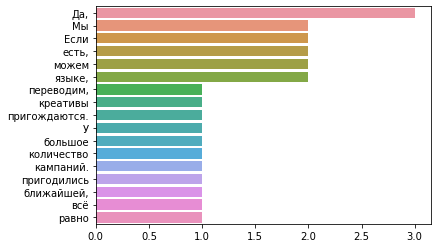

In [255]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word42,count in most[:30]:
    if (word42 not in stop_words):
        x.append(word42)
        y.append(count)

sns.barplot(x=y,y=x)

In [256]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [257]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word42, sum_words[0, idx])
                  for word42, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

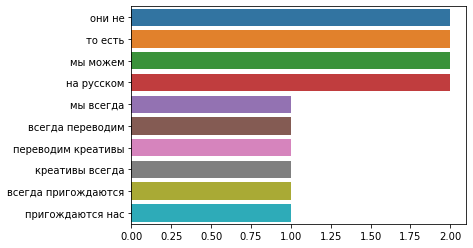

In [258]:
top_n_bigrams=get_top_ngram(df["4.2."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

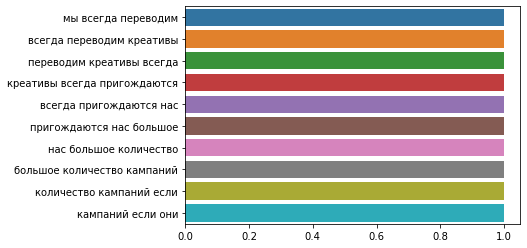

In [259]:
top_n_bigrams=get_top_ngram(df["4.2."],3)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [260]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [261]:
from textblob import TextBlob
TextBlob(text42).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [262]:
def polarity(text42):
    return TextBlob(text42).sentiment.polarity

<AxesSubplot:>

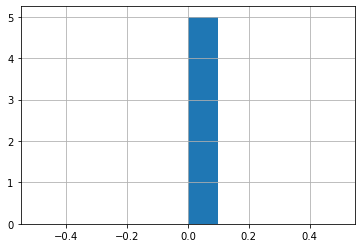

In [263]:
df['polarity_score'] = df['4.2.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 1 artists>

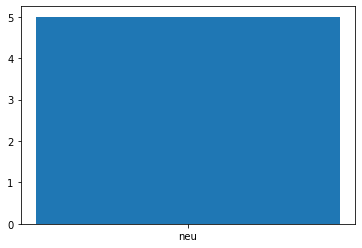

In [264]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 4.3.

### Облако слов

In [265]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [266]:
pip install pymorphy2

In [267]:
import pymorphy2

In [268]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [269]:
from wordcloud import WordCloud

In [270]:
import nltk as nltk

In [271]:
from nltk.tokenize import word_tokenize 

In [272]:
from nltk.corpus import stopwords

In [273]:
stop_words = stopwords.words('russian')

In [274]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [275]:
text43 = ' '.join(df['4.3.'])
text43

'Могу такой пример привести. Очень часто мы получаем фотографии с очень просторными и большими квартирами. То есть, такого плана помещения уместны, например, для американского рынка, но для российского рынка – это не релевантно. Как правило, у большей части населения России нет гигантских студий, домов, апартаментов, лофтов и таких больших пространств. Как правило, это малогабаритные квартиры. Поэтому такие креативы мы сохраняем и используем для премиальной категории потребителей, если компания конкретно на них нацелена, но, в целом, это не совсем уместно, особенно если это линейка встраиваемой техники middle сегмента. Да, конечно, часто в креативах присутствует несколько продуктов, например, разных цветов или габаритов. Но в Россию какой-то продукт не поставляется, тут мы вынуждены менять пэкшоты или не использовать креатив. Также бывает, что интерьер характерен корейским домам, а не российским. Наши клиенты просто его не поймут, им он будет не близок. Поэтому такие креативы мы не бер

In [276]:
text43 = word_tokenize(text43)
text43

['Могу',
 'такой',
 'пример',
 'привести',
 '.',
 'Очень',
 'часто',
 'мы',
 'получаем',
 'фотографии',
 'с',
 'очень',
 'просторными',
 'и',
 'большими',
 'квартирами',
 '.',
 'То',
 'есть',
 ',',
 'такого',
 'плана',
 'помещения',
 'уместны',
 ',',
 'например',
 ',',
 'для',
 'американского',
 'рынка',
 ',',
 'но',
 'для',
 'российского',
 'рынка',
 '–',
 'это',
 'не',
 'релевантно',
 '.',
 'Как',
 'правило',
 ',',
 'у',
 'большей',
 'части',
 'населения',
 'России',
 'нет',
 'гигантских',
 'студий',
 ',',
 'домов',
 ',',
 'апартаментов',
 ',',
 'лофтов',
 'и',
 'таких',
 'больших',
 'пространств',
 '.',
 'Как',
 'правило',
 ',',
 'это',
 'малогабаритные',
 'квартиры',
 '.',
 'Поэтому',
 'такие',
 'креативы',
 'мы',
 'сохраняем',
 'и',
 'используем',
 'для',
 'премиальной',
 'категории',
 'потребителей',
 ',',
 'если',
 'компания',
 'конкретно',
 'на',
 'них',
 'нацелена',
 ',',
 'но',
 ',',
 'в',
 'целом',
 ',',
 'это',
 'не',
 'совсем',
 'уместно',
 ',',
 'особенно',
 'если',
 'это

In [277]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [278]:
def lemmatize_text(tokens):
    text_new_43=''
    for word43 in tokens:
        word43 = lemmatizer.parse(word43)
        text_new_43 = text_new_43 + ' ' + word43[0].normal_form
    return text_new_43

In [279]:
text43 = lemmatize_text(text43)
text43

' мочь такой пример привести . очень часто мы получать фотография с очень просторный и больший квартира . то есть , такой план помещение уместный , например , для американский рынок , но для российский рынок – это не релевантный . как правило , у больший часть население россия нет гигантский студия , дом , апартамент , лофт и такой больший пространство . как правило , это малогабаритный квартира . поэтому такой креатив мы сохранять и использовать для премиальный категория потребитель , если компания конкретно на они нацелить , но , в целое , это не совсем уместно , особенно если это линейка встраивать техника middle сегмент . да , конечно , часто в креатив присутствовать несколько продукт , например , разный цвет или габарит . но в россия какой-то продукт не поставляться , тут мы вынудить менять пэкшота или не использовать креатив . также бывать , что интерьер характерный корейский дом , а не российский . наш клиент просто он не понять , они он быть не близкий . поэтому такой креатив м

In [280]:
text43 = text43.lower()
text43

' мочь такой пример привести . очень часто мы получать фотография с очень просторный и больший квартира . то есть , такой план помещение уместный , например , для американский рынок , но для российский рынок – это не релевантный . как правило , у больший часть население россия нет гигантский студия , дом , апартамент , лофт и такой больший пространство . как правило , это малогабаритный квартира . поэтому такой креатив мы сохранять и использовать для премиальный категория потребитель , если компания конкретно на они нацелить , но , в целое , это не совсем уместно , особенно если это линейка встраивать техника middle сегмент . да , конечно , часто в креатив присутствовать несколько продукт , например , разный цвет или габарит . но в россия какой-то продукт не поставляться , тут мы вынудить менять пэкшота или не использовать креатив . также бывать , что интерьер характерный корейский дом , а не российский . наш клиент просто он не понять , они он быть не близкий . поэтому такой креатив м

In [281]:
rec = np.array(Image.open('rec.jpg'))

In [282]:
cloud43 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=40, mask=rec).generate(text43)

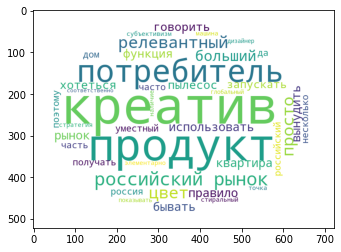

In [283]:
plt.imshow(cloud43)

### Частотные графики

In [284]:
import seaborn as sns

In [285]:
corpus=[]
new43 = df['4.3.'].str.split()
new43 = new43.values.tolist()
corpus=[word43 for i in new43 for word43 in i]

from collections import defaultdict
dic=defaultdict(int)
for word43 in corpus:
    if word43 in stop_words:
        dic[word43]+=1

In [286]:
import collections

In [287]:
from collections import Counter

<AxesSubplot:>

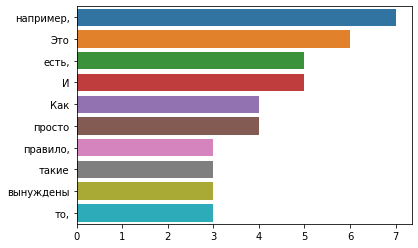

In [288]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word43,count in most[:30]:
    if (word43 not in stop_words):
        x.append(word43)
        y.append(count)

sns.barplot(x=y,y=x)

In [289]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [290]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word43, sum_words[0, idx])
                  for word43, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

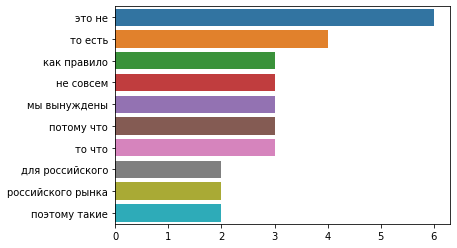

In [291]:
top_n_bigrams=get_top_ngram(df["4.3."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

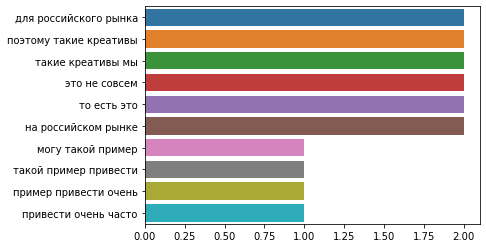

In [292]:
top_n_bigrams=get_top_ngram(df["4.3."],3)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [293]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [294]:
from textblob import TextBlob
TextBlob(text43).sentiment

Sentiment(polarity=0.0, subjectivity=0.375)

In [295]:
def polarity(text43):
    return TextBlob(text43).sentiment.polarity

<AxesSubplot:>

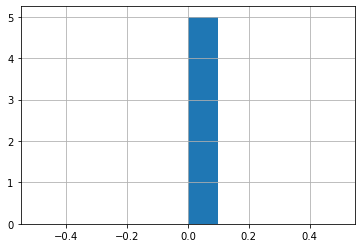

In [296]:
df['polarity_score'] = df['4.3.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 1 artists>

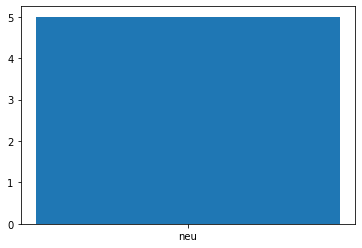

In [297]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 5.1.

### Облако слов

In [298]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [299]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [300]:
import pymorphy2

In [301]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [302]:
from wordcloud import WordCloud

In [303]:
import nltk as nltk

In [304]:
from nltk.tokenize import word_tokenize 

In [305]:
from nltk.corpus import stopwords

In [306]:
stop_words = stopwords.words('russian')

In [324]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [325]:
text51 = ' '.join(df['5.1.'])
text51

'Основные метрики – это бренд индексы, они замеряются раз в полгода. Что касается моих категорий, мы ориентируемся на метрики Nielsen, также используются метрики GFK. Как правило, это market share и price premium. Сейчас изменилась стратегия. Из-за ухода премиальных брендов, мы стали учитывать и бренд индекс most likely to purchase. Метрики отличаются по каналам продвижения. Они могут отличаться в даже внутри одного канала в зависимости от целей. Если медийная кампания performance нацелена на поддержку продаж и акций, то, естественно, результатом должно стать увеличение продаж. Во-первых, в digital, например, человек увидел баннер или объявление в поиске, перешёл и купил, во-вторых, изменение офлайн продаж в физических магазинах. Например, для крупной бытовой техники большую долю составляют офлайн продажи, поэтому не стоит исключать влияние digital кампаний и на офлайн продажи. Если же, например, продукт только вышел, и люди в принципе не совсем знают, что он существует на российском р

In [326]:
text51 = word_tokenize(text51)
text51

['Основные',
 'метрики',
 '–',
 'это',
 'бренд',
 'индексы',
 ',',
 'они',
 'замеряются',
 'раз',
 'в',
 'полгода',
 '.',
 'Что',
 'касается',
 'моих',
 'категорий',
 ',',
 'мы',
 'ориентируемся',
 'на',
 'метрики',
 'Nielsen',
 ',',
 'также',
 'используются',
 'метрики',
 'GFK',
 '.',
 'Как',
 'правило',
 ',',
 'это',
 'market',
 'share',
 'и',
 'price',
 'premium',
 '.',
 'Сейчас',
 'изменилась',
 'стратегия',
 '.',
 'Из-за',
 'ухода',
 'премиальных',
 'брендов',
 ',',
 'мы',
 'стали',
 'учитывать',
 'и',
 'бренд',
 'индекс',
 'most',
 'likely',
 'to',
 'purchase',
 '.',
 'Метрики',
 'отличаются',
 'по',
 'каналам',
 'продвижения',
 '.',
 'Они',
 'могут',
 'отличаться',
 'в',
 'даже',
 'внутри',
 'одного',
 'канала',
 'в',
 'зависимости',
 'от',
 'целей',
 '.',
 'Если',
 'медийная',
 'кампания',
 'performance',
 'нацелена',
 'на',
 'поддержку',
 'продаж',
 'и',
 'акций',
 ',',
 'то',
 ',',
 'естественно',
 ',',
 'результатом',
 'должно',
 'стать',
 'увеличение',
 'продаж',
 '.',
 'Во

In [327]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [328]:
def lemmatize_text(tokens):
    text_new_51=''
    for word51 in tokens:
        word51 = lemmatizer.parse(word51)
        text_new_51 = text_new_51 + ' ' + word51[0].normal_form
    return text_new_51

In [329]:
text51 = lemmatize_text(text51)
text51

' основной метрика – это бренд индекс , они замеряться раз в полгода . что касаться мой категория , мы ориентироваться на метрика nielsen , также использоваться метрика gfk . как правило , это market share и price premium . сейчас измениться стратегия . из-за уход премиальный бренд , мы стать учитывать и бренд индекс most likely to purchase . метрика отличаться по канал продвижение . они мочь отличаться в даже внутри один канал в зависимость от цель . если медийный кампания performance нацелить на поддержка продажа и акция , то , естественно , результат должный стать увеличение продажа . во-первых , в digital , например , человек увидеть баннер или объявление в поиск , перейти и купить , во-вторых , изменение офлайн продажа в физический магазин . например , для крупный бытовой техника больший доля составлять офлайн продажа , поэтому не стоить исключать влияние digital кампания и на офлайн продажа . если же , например , продукт только выйти , и человек в принцип не совсем знать , что он

In [330]:
text51 = text51.lower()
text51

' основной метрика – это бренд индекс , они замеряться раз в полгода . что касаться мой категория , мы ориентироваться на метрика nielsen , также использоваться метрика gfk . как правило , это market share и price premium . сейчас измениться стратегия . из-за уход премиальный бренд , мы стать учитывать и бренд индекс most likely to purchase . метрика отличаться по канал продвижение . они мочь отличаться в даже внутри один канал в зависимость от цель . если медийный кампания performance нацелить на поддержка продажа и акция , то , естественно , результат должный стать увеличение продажа . во-первых , в digital , например , человек увидеть баннер или объявление в поиск , перейти и купить , во-вторых , изменение офлайн продажа в физический магазин . например , для крупный бытовой техника больший доля составлять офлайн продажа , поэтому не стоить исключать влияние digital кампания и на офлайн продажа . если же , например , продукт только выйти , и человек в принцип не совсем знать , что он

In [331]:
rec = np.array(Image.open('rec.jpg'))

In [334]:
cloud51 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=50, mask=rec).generate(text51)

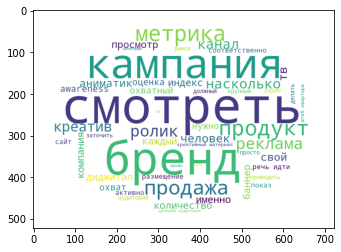

In [335]:
plt.imshow(cloud51)

### Частотные графики

In [336]:
import seaborn as sns

In [337]:
corpus=[]
new51 = df['5.1.'].str.split()
new51 = new51.values.tolist()
corpus=[word51 for i in new51 for word51 in i]

from collections import defaultdict
dic=defaultdict(int)
for word51 in corpus:
    if word51 in stop_words:
        dic[word51]+=1

In [338]:
import collections

In [339]:
from collections import Counter

<AxesSubplot:>

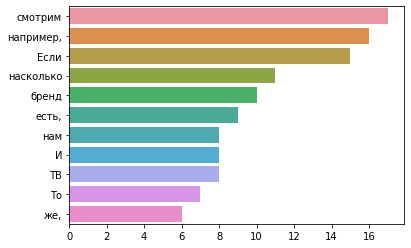

In [340]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word51,count in most[:30]:
    if (word51 not in stop_words):
        x.append(word51)
        y.append(count)

sns.barplot(x=y,y=x)

In [341]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [342]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word51, sum_words[0, idx])
                  for word51, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

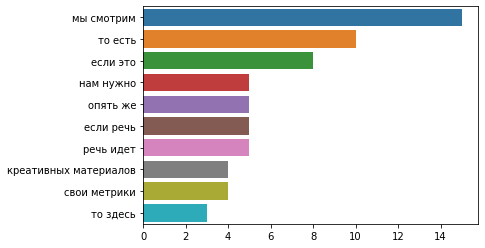

In [343]:
top_n_bigrams=get_top_ngram(df["5.1."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

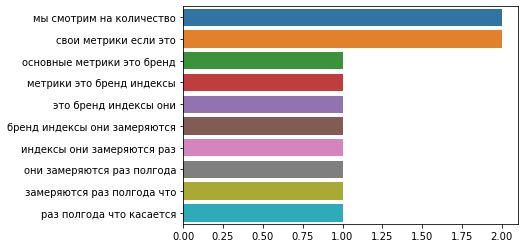

In [345]:
top_n_bigrams=get_top_ngram(df["5.1."],4)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [346]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [347]:
from textblob import TextBlob
TextBlob(text51).sentiment

Sentiment(polarity=0.2, subjectivity=0.4)

In [348]:
def polarity(text51):
    return TextBlob(text51).sentiment.polarity

<AxesSubplot:>

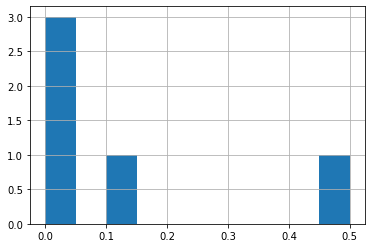

In [349]:
df['polarity_score'] = df['5.1.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 2 artists>

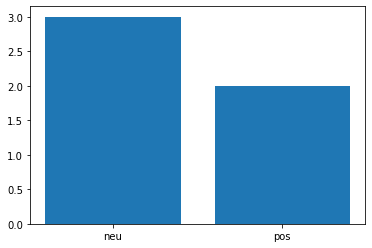

In [350]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

# Вопрос 5.2.

### Облако слов

In [351]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [352]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [353]:
import pymorphy2

In [354]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [355]:
from wordcloud import WordCloud

In [356]:
import nltk as nltk

In [357]:
from nltk.tokenize import word_tokenize 

In [358]:
from nltk.corpus import stopwords

In [359]:
stop_words = stopwords.words('russian')

In [360]:
df = pd.read_excel('датасет.xlsx')
df

,Respondent,1.1.,1.2.,1.3.,2.1.,2.2.,2.3.,2.4.,3.1.,3.1.1.,3.2.,3.3.,4.1.,4.2.,4.3.,5.1.,5.2.,6.1.,6.2.
0,1,Продакт маркетинг менеджер категории встраивае...,"2,5 года, получается. Название компании A, а е...","Если говорить про категорию пылесосов, бренд б...","Да, конечно, локализация обязательна для росси...","Потребности самого покупателя, то есть, сначал...","В целом я бы сказала, что основные каналы те ж...","В зависимости от страны. Если, например, сравн...","У нас есть бренд буки, общие у компании, котор...","У нас есть бренд буки, общие у компании, котор...","И да, и нет. С одной стороны, у нас есть глоба...",Все зависит от продукта и менеджера в штаб-ква...,Я бы тоже разделила на блоки. Стандартизация т...,"Мы всегда переводим, креативы всегда пригождаю...",Могу такой пример привести. Очень часто мы пол...,"Основные метрики – это бренд индексы, они заме...","С метриками сложнее, наверное. Я думаю, штаб-к...",Здесь очень сложно сказать местный ли это креа...,"Честно говоря, затрудняюсь ответить. Совсем пр..."
1,2,Ведущий специалист отдела маркетинга в департа...,"Около девяти лет, удалось подготовить стратеги...","Я являюсь менеджером бренда А, он является меж...","Нет, все, конечно, зависит от конкретной компа...","Мы создаём локальные креативы в том случае, ес...","В большинстве своем скорее нет. Единственное, ...","Как я говорила ранее, креативные материалы отл...",Начну с конца. Если мы получаем вместе с проду...,Начну с конца. Если мы получаем вместе с проду...,"Да, у нас есть мировой контракт, и мы подключе...","Да, у нас очень плотное общение, оно происходи...","Ну, в первую очередь если мы не можем озвучить...","Да, это обязательное правило по российским зак...","Да, конечно, часто в креативах присутствует не...","Ну, у нас есть бэк дата, когда мы понимаем, ка...",Чаще всего они одинаковые. Это какие-то медиа ...,"Ну, вот, например, наши прямые конкуренты Sams...",Но у нас неудачных адаптаций на локальном рынк...
2,3,Я работаю в компании A в отделе продакт маркет...,Бытовой техники – 5 лет. Для брендов таких кат...,"В данный момент — это бренд А, он глобальный и...","Так, сейчас попробую коротко ответить, хотя та...","Ну, если опять же, смотреть в разрезе бытовой ...","Каналы коммуникации, знаешь, плюс минус. Это т...","Ну, к сожалению, мне кажется, тут не в нашу по...","Я скажу так, очень сильно мы зависим от глобал...","Я скажу так, очень сильно мы зависим от глобал...","Большинство наших агентств, которые были отобр...","Мы начинаем отчитываться до, когда мы предоста...","Чаще всего адаптируется креатив, key visual, к...","Обязательно. Мы креативный материал, в том чис...","На самом деле, в начале разглагольствовал как ...","Это, опять же, зависит от канала продвижения. ...",Я уже отчасти тоже затронула этот вопрос ранее...,Я по профессиональной необходимости и просто п...,Не хочу критиковать никого из коллег из других...
3,4,Я работаю руководителем отдела маркетинга по б...,"Более 10 лет. Для брендов в бытовой технике, а...","Да, сейчас я занимаюсь продвижением бренда А. ...","Глобальная стратегия всегда есть, она разработ...","Наверное, релевантность проблемы или, там, как...",В настоящем это совершенно другой вид каналов ...,"Для нашей техники я бы сказала, что мы адаптир...","В целом у нас, скажем так, запротоколирован пр...","В целом у нас, скажем так, запротоколирован пр...",Да.,Выбор медиа каналов уже полностью на нашей сто...,"Собственно говоря, это выбор ключевых преимуще...","Да, все материалы переводятся, не переводятся ...",У нас на глобальном рынке была очень популярна...,"У нас каждый год проводится бренд лифт, опрос....",В диджитал чаще всего они совпадают. Они могут...,"Из того, что я помню, это была креативная комп...",Я сейчас не назову конкретную кампанию. Когда ...
4,5,В настоящее время я работаю продакт маркетинг ...,Я занимаюсь продвижением бытовой техники больш...,На данный момент я являюсь бренд-менеджером ко...,В нашем случае она отличается частично. Это об...,"В случае бытовой техн

In [361]:
text52 = ' '.join(df['5.2.'])
text52

'С метриками сложнее, наверное. Я думаю, штаб-квартира оценивает больше в целом стратегическое значение. Они смотрят больше на коммуникацию самого продукта, на, возможно, риски. Что касается российского рынка, то здесь больше нацелены на понимание аудитории.  Чаще всего они одинаковые. Это какие-то медиа показатели и бренд исследования прироста знания о бренде, о продукте. Я уже отчасти тоже затронула этот вопрос ранее. То есть, я сказала, что тут мы не ориентируемся на глобальный офис, у нас есть своя собственная экспертиза. Это экспертиза продакт маркетинг менеджеров и это экспертиза агентств, которые, собственно, технически запускают кампании и отчитываются по этим кампаниям, присылая нам отчеты, план и процент выполнения. По этому плану, соответственно, у нас как бы нет образца, примера, на котором бы мы ориентировались. Нет, тут полностью мы сами всем рулим и скорее потом отчитываемся, делаем выводы и предоставляем, собственно, отчеты в головной офис. То есть, даже на моем опыте н

In [362]:
text52 = word_tokenize(text52)
text52

['С',
 'метриками',
 'сложнее',
 ',',
 'наверное',
 '.',
 'Я',
 'думаю',
 ',',
 'штаб-квартира',
 'оценивает',
 'больше',
 'в',
 'целом',
 'стратегическое',
 'значение',
 '.',
 'Они',
 'смотрят',
 'больше',
 'на',
 'коммуникацию',
 'самого',
 'продукта',
 ',',
 'на',
 ',',
 'возможно',
 ',',
 'риски',
 '.',
 'Что',
 'касается',
 'российского',
 'рынка',
 ',',
 'то',
 'здесь',
 'больше',
 'нацелены',
 'на',
 'понимание',
 'аудитории',
 '.',
 'Чаще',
 'всего',
 'они',
 'одинаковые',
 '.',
 'Это',
 'какие-то',
 'медиа',
 'показатели',
 'и',
 'бренд',
 'исследования',
 'прироста',
 'знания',
 'о',
 'бренде',
 ',',
 'о',
 'продукте',
 '.',
 'Я',
 'уже',
 'отчасти',
 'тоже',
 'затронула',
 'этот',
 'вопрос',
 'ранее',
 '.',
 'То',
 'есть',
 ',',
 'я',
 'сказала',
 ',',
 'что',
 'тут',
 'мы',
 'не',
 'ориентируемся',
 'на',
 'глобальный',
 'офис',
 ',',
 'у',
 'нас',
 'есть',
 'своя',
 'собственная',
 'экспертиза',
 '.',
 'Это',
 'экспертиза',
 'продакт',
 'маркетинг',
 'менеджеров',
 'и',
 '

In [363]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [364]:
def lemmatize_text(tokens):
    text_new_52=''
    for word52 in tokens:
        word52 = lemmatizer.parse(word52)
        text_new_52 = text_new_52 + ' ' + word52[0].normal_form
    return text_new_52

In [365]:
text52 = lemmatize_text(text52)
text52

' с метрика сложный , наверное . я думать , штаб-квартира оценивать большой в целое стратегический значение . они смотреть большой на коммуникация сам продукт , на , возможно , риск . что касаться российский рынок , то здесь большой нацелить на понимание аудитория . частый весь они одинаковый . это какой-то медиа показатель и бренд исследование прирост знание о бренд , о продукт . я уже отчасти тоже затронуть этот вопрос ранее . то есть , я сказать , что тут мы не ориентироваться на глобальный офис , у мы есть свой собственный экспертиза . это экспертиза продакт маркетинг менеджер и это экспертиза агентство , который , собственно , технически запускать кампания и отчитываться по это кампания , присылать мы отчёт , план и процент выполнение . по этот план , соответственно , у мы как бы нет образец , пример , на который бы мы ориентироваться . нет , тут полностью мы сам весь рулить и скорее потом отчитываться , делать вывод и предоставлять , собственно , отчёт в головной офис . то есть ,

In [366]:
text52 = text52.lower()
text52

' с метрика сложный , наверное . я думать , штаб-квартира оценивать большой в целое стратегический значение . они смотреть большой на коммуникация сам продукт , на , возможно , риск . что касаться российский рынок , то здесь большой нацелить на понимание аудитория . частый весь они одинаковый . это какой-то медиа показатель и бренд исследование прирост знание о бренд , о продукт . я уже отчасти тоже затронуть этот вопрос ранее . то есть , я сказать , что тут мы не ориентироваться на глобальный офис , у мы есть свой собственный экспертиза . это экспертиза продакт маркетинг менеджер и это экспертиза агентство , который , собственно , технически запускать кампания и отчитываться по это кампания , присылать мы отчёт , план и процент выполнение . по этот план , соответственно , у мы как бы нет образец , пример , на который бы мы ориентироваться . нет , тут полностью мы сам весь рулить и скорее потом отчитываться , делать вывод и предоставлять , собственно , отчёт в головной офис . то есть ,

In [331]:
rec = np.array(Image.open('rec.jpg'))

In [369]:
cloud52 = WordCloud(stopwords=stop_words, background_color='#FFFFFF', max_words=40, mask=rec).generate(text52)

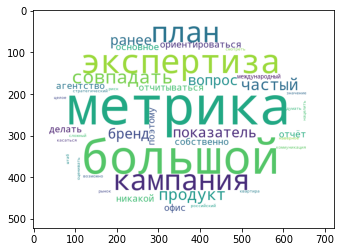

In [370]:
plt.imshow(cloud52)

### Частотные графики

In [336]:
import seaborn as sns

In [371]:
corpus=[]
new52 = df['5.2.'].str.split()
new52 = new52.values.tolist()
corpus=[word52 for i in new52 for word52 in i]

from collections import defaultdict
dic=defaultdict(int)
for word52 in corpus:
    if word52 in stop_words:
        dic[word52]+=1

In [372]:
import collections

In [373]:
from collections import Counter

<AxesSubplot:>

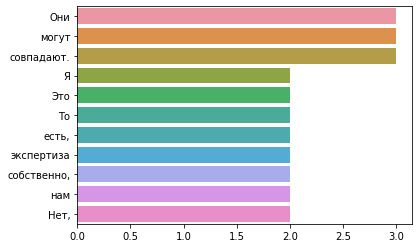

In [374]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word52,count in most[:30]:
    if (word52 not in stop_words):
        x.append(word52)
        y.append(count)

sns.barplot(x=y,y=x)

In [375]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [376]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word52, sum_words[0, idx])
                  for word52, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

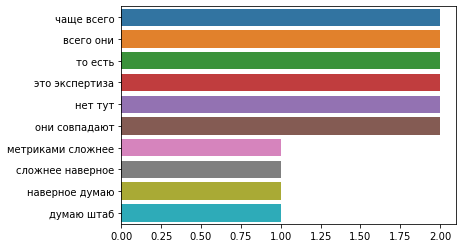

In [377]:
top_n_bigrams=get_top_ngram(df["5.2."],2)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

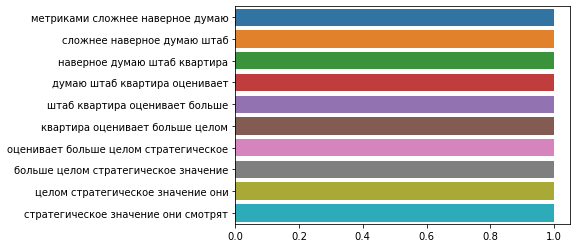

In [384]:
top_n_bigrams=get_top_ngram(df["5.2."],4)[:100] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

### Сентимент анализ

In [385]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [386]:
from textblob import TextBlob
TextBlob(text52).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [388]:
def polarity(text52):
    return TextBlob(text52).sentiment.polarity

<AxesSubplot:>

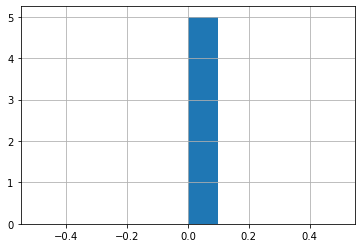

In [389]:
df['polarity_score'] = df['5.2.'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 1 artists>

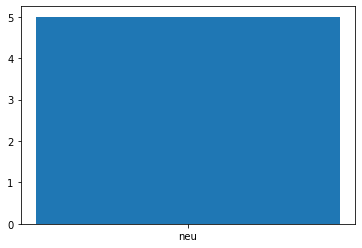

In [390]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())